# Homework 4 

1. Acquire power data (https://www.bmreports.com/bmrs/?q=demand/rollingsystemdemand/historic) for 7 days (Include each day of the week)

1. Create two bar graphs of the power consumption per hour.

    * One bar graph has 24 bars showing the average consumption
    * One bar graph has 7x24 bars showing the average demand 

1. Your solution should be committed in your Week04 folder.

Graphs must have appropriate labels and there should not be anything extra cluttering. 

## 1. Acquire power data (https://www.bmreports.com/bmrs/?q=demand/rollingsystemdemand) for at least 10 days and not more than 40 days

In [82]:
# import pandas
import pandas as pd

path = r"C:\Users\HP\OneDrive\Desktop\Data601 Jupyter notebook\RollingSystemDemand.csv"
dframe = pd.read_csv(path,names=['HDR','Date&Time','Demand'])

dframe

,HDR,Date&Time,Demand
0,HDR,ROLLING SYSTEM DEMAND,NaN
1,VD,20220128000000,30185.0
2,VD,20220128000500,30171.0
3,VD,20220128001000,30180.0
4,VD,20220128001500,30155.0
...,...,...,...
1997,VD,20220203222000,30455.0
1998,VD,20220203222500,30054.0
1999,VD,20220203223000,29744.0
2000,VD,20220203223500,29506.0


In [83]:
dframe.dropna(axis = 0,how='any',inplace = True)

dframe['Date&Time'] = pd.to_datetime(dframe['Date&Time'])
dframe['Date'] = pd.to_datetime(dframe['Date&Time'],errors='coerce').dt.date
dframe['Hour'] = pd.to_datetime(dframe['Date&Time'],errors='coerce').dt.hour
dframe['Hours'] = pd.to_datetime(dframe['Date&Time'],errors='coerce').dt.hour
dframe['Demand']= dframe['Demand'].astype(int)

df = dframe.groupby('Hour').mean()
df['Hours'] = df['Hours']+1

df

,Demand,Hours
Hour,,
0,26912.059524,1.0
1,27039.000000,2.0
2,26407.595238,3.0
3,25945.773810,4.0
4,25723.940476,5.0
5,26220.440476,6.0
6,29253.345238,7.0
7,33172.464286,8.0
8,35122.880952,9.0


## 2. Create two bar graphs of the power consumption per hour.
### a. One bar graph has 24 bars 
### b. One bar graph has 24 times number of days bars

In [84]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, '24 hours Graph')

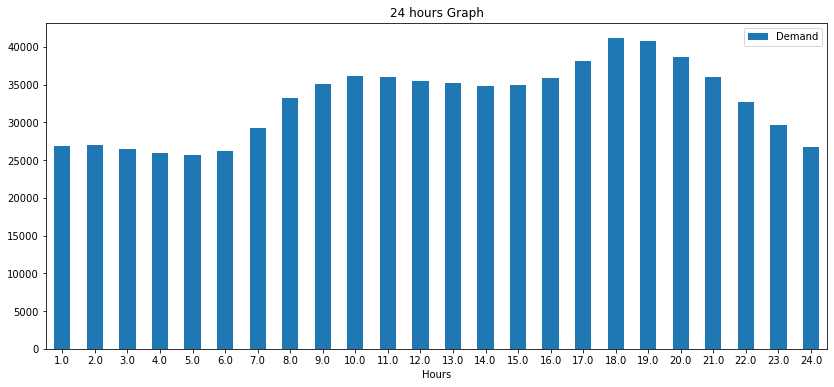

In [86]:
daily = df.plot.bar(x='Hours',y='Demand',rot = 0,figsize=(14,6))
plt.title('24 hours Graph')

In [87]:
new_df = dframe.groupby(['Date','Hour']).mean()
new_df['Hours'] = new_df['Hours']+1
new_df

Demand  Hours
Date       Hour                     
2022-01-28 0     30142.666667    1.0
           1     29881.500000    2.0
           2     28866.166667    3.0
           3     28886.333333    4.0
           4     28976.166667    5.0
...                       ...    ...
2022-02-03 18    41577.500000   19.0
           19    39531.250000   20.0
           20    36952.416667   21.0
           21    33638.583333   22.0
           22    30625.000000   23.0

[167 rows x 2 columns]

Text(0.5, 1.0, 'Cummulative Graph')

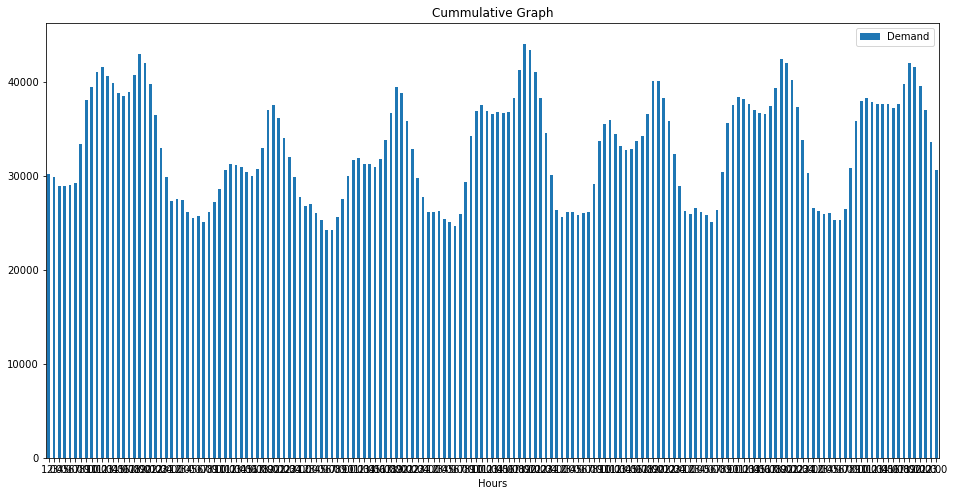

In [88]:
cummulative = new_df.plot.bar(x='Hours',y='Demand',rot = 0,figsize=(16,8))
plt.title('Cummulative Graph')